# Homework 2

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.api as sm
from sklearn import linear_model 
import pandas as pd

### Question 1

**********This is a python based analysis************

In [2]:
def generate_data_points(n,p):
    data_points_variable = np.zeros(shape = (n,p))
    data_points_output = np.zeros(shape = (n,1))
    for i in range(n):
        X = np.random.randn(p)
        Y = X[0] / np.sqrt(2) + np.random.randn(1)/np.sqrt(2)
        data_points_output[i] = Y
        data_points_variable[i,:] = X
    return (data_points_variable,data_points_output)

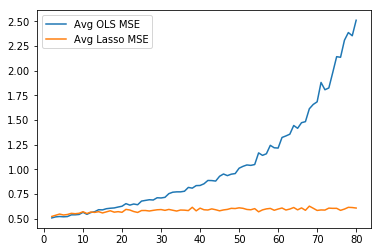

In [20]:
simulations = 100
n = 100
m = 100
avg_OLS_MSE = np.zeros(len(range(2,81)))
avg_Lasso_MSE = np.zeros(len(range(2,81)))
for p in range(2,81):
    OLSMSE = 0
    LassoMSE = 0
    for sim_count in range(simulations):
        #Training set
        (X_train,Y_train) = generate_data_points(n,p)
        modelOLS = sm.OLS(Y_train,X_train)
        OLSresults = modelOLS.fit()
        (X_test,Y_test) = generate_data_points(m,p)
        OLSpredictions = OLSresults.predict(X_test)
        OLSpredictions = OLSpredictions.reshape((m,1))
        OLSMSE = OLSMSE + np.sum((Y_test-OLSpredictions)**2)/m
        modelLasso = linear_model.Lasso(alpha=np.sqrt(2*np.log(p)/n))
        Lassoresults = modelLasso.fit(X_train,Y_train)
        Lassopredictions = Lassoresults.predict(X_test)
        Lassopredictions = Lassopredictions.reshape((m,1))
        LassoMSE = LassoMSE + np.sum((Y_test-Lassopredictions)**2)/m
    avg_OLS_MSE[p-2] = OLSMSE/simulations
    avg_Lasso_MSE[p-2] = LassoMSE/simulations
plt.plot(range(2,81),avg_OLS_MSE)
plt.plot(range(2,81),avg_Lasso_MSE)
plt.gca().legend(("Avg OLS MSE", "Avg Lasso MSE"))

I can see that dimension size adjusted regularization ensures that the average MSE doesn't explode with more dimensions in the case of lasso regression. OLS regression doesn't have any regularization to account for additional variance added by each addition to the dimensions and Lasso regression clearly improves on that. 

Given majority of recent modeling around data science and finance uses a large number of features, lasso regression definitely seems to be doing much better than ordinary least squares based regression.